In [24]:
from pathlib import Path
import shutil

from tqdm import tqdm
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# It is a good idea to experiment with these values
THRESHOLD = 75

In [3]:
# Get the images
PATH = Path("../../data/llff/deer_v6_debug_script_picked_blurry_v2")
image_filenames = list((PATH / "images").rglob("**/*.JPG"))
len(image_filenames)

206

In [41]:
def variance_of_laplacian(image, quiet=True):
	# compute the Laplacian of the image and then return the focus
	# measure, which is simply the variance of the Laplacian
	laplacian_img = cv2.Laplacian(image, cv2.CV_64F) # has same shape as the original image

	if not quiet:
		_, axes = plt.subplots(1, 2, figsize=(8, 16))
		axes = axes.flatten()
		for img, ax in zip([image, laplacian_img*255], axes):
			ax.imshow(img, cmap="gray", vmin=0, vmax=255)
		plt.show()

	return laplacian_img.var()

In [43]:
blurry_image_filenames = []
focus_measures = []

# loop over the input images
for i, img_fn in enumerate(tqdm(image_filenames, total=len(image_filenames), leave=False)):
    # load the image, convert it to grayscale, and compute the
    # focus measure of the image using the Variance of Laplacian method
    image = cv2.imread(str(img_fn))
    grayscale_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    focus_measure = variance_of_laplacian(grayscale_image)

    focus_measures.append(focus_measure)

    # Check if blurry
    if focus_measure < THRESHOLD:
        blurry_image_filenames.append(img_fn)

In [44]:
len(blurry_image_filenames), len(blurry_image_filenames) / len(image_filenames)

(24, 0.11650485436893204)

(array([ 3.,  3.,  7.,  6.,  8., 13., 10.,  8.,  5.,  8.,  6.,  9.,  8.,
         4.,  4.,  5.,  9.,  6.,  5.,  3.,  2.,  7.,  4.,  2.,  3.,  2.,
         4.,  5.,  2.,  4.,  5.,  3.,  4.,  3.,  2.,  1.,  2.,  1.,  3.,
         1.,  2.,  3.,  2.,  5.,  1.,  1.,  0.,  1.,  0.,  1.]),
 array([ 16.94058875,  23.69041349,  30.44023824,  37.19006298,
         43.93988773,  50.68971247,  57.43953722,  64.18936196,
         70.93918671,  77.68901145,  84.4388362 ,  91.18866094,
         97.93848568, 104.68831043, 111.43813517, 118.18795992,
        124.93778466, 131.68760941, 138.43743415, 145.1872589 ,
        151.93708364, 158.68690839, 165.43673313, 172.18655788,
        178.93638262, 185.68620737, 192.43603211, 199.18585686,
        205.9356816 , 212.68550635, 219.43533109, 226.18515584,
        232.93498058, 239.68480533, 246.43463007, 253.18445482,
        259.93427956, 266.68410431, 273.43392905, 280.1837538 ,
        286.93357854, 293.68340329, 300.43322803, 307.18305278,
        313.

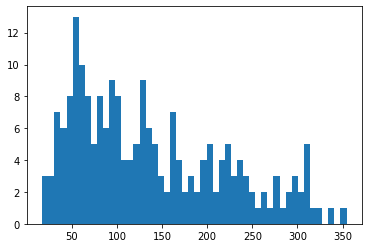

In [49]:
plt.hist(focus_measures, bins=50)

In [25]:
# Uncomment below when you are ready to remove the images
# for img_fn in blurry_image_filenames:
#     shutil.move(img_fn, str(PATH / "bad_images" / "blurry" / img_fn.name))